# 1d diffusion 

In [33]:
import numpy
import matplotlib.pyplot as plt

In [34]:
def diffuse(concentration,constant,cellscale):
    gradientsleft=(concentrations[1:-1]-concentrations[:-2])/cellscale
    gradientsright=(concentrations[1:-1]-concentrations[2:])/cellscale
    concentration[1:-1]=concentration[1:-1]+gradientsleft*-1*constant+-1*gradientsright*constant   

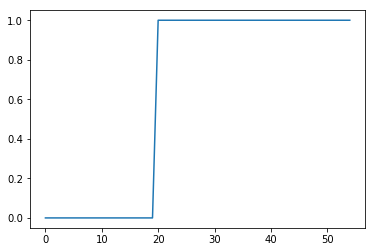

In [35]:
concentrations=numpy.round(numpy.sin(numpy.array(range(55))/20))
plt.plot(concentrations)
plt.show()

In [36]:
for i in range(100):
    diffuse(concentrations,0.1,1)

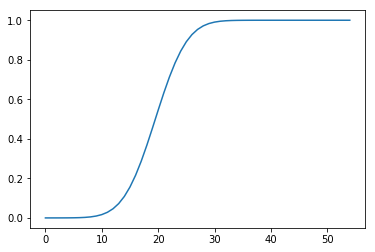

In [37]:
plt.plot(concentrations)
plt.show()

In [38]:
for i in range(1000):
    diffuse(concentrations,0.1,1)

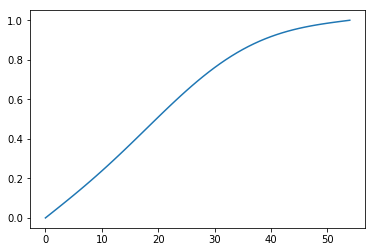

In [39]:
plt.plot(concentrations)
plt.show()

In [40]:
for i in range(20000):
    diffuse(concentrations,0.1,1)

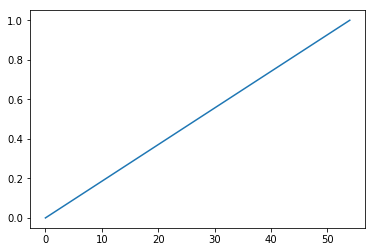

In [41]:
plt.plot(concentrations)
plt.show()

# d >= 1

In [24]:
def diffuse_multi_d(concentration,constant,cellscale):
    sliceleft = lambda n: slice(0,n-2,1)
    sliceright = lambda n: slice(2,n,1)
    slicemiddle = lambda n: slice(1,n-1,1)
    total_slice_middle = [slicemiddle(n) for n in concentrations.shape]
    
    def flux_1_dim(dim):
        total_slice_left =  [sliceleft(n)  if d == dim else slicemiddle(n) for
                             d,n in enumerate(concentrations.shape)]
        total_slice_right = [sliceright(n) if d == dim else slicemiddle(n) for
                             d,n in enumerate(concentrations.shape)]
        
        gradientleft=(concentration[total_slice_left]-concentration[total_slice_middle])/cellscale
        gradientright=(concentration[total_slice_right]-concentration[total_slice_middle])/cellscale
        return ((gradientleft+gradientright)*constant)
    
    totalflux=sum([flux_1_dim(dim) for dim in range(concentration.ndim)])
    concentration[total_slice_middle]+=totalflux


# 1d

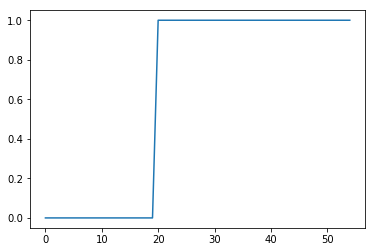

In [25]:
concentrations=numpy.round(numpy.sin(numpy.array(range(55))/20))
plt.plot(concentrations)
plt.show()

In [26]:
for i in range(200):
    diffuse_multi_d(concentrations,0.1,1)

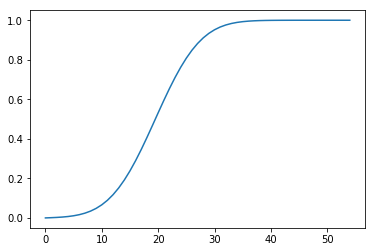

In [27]:

plt.plot(concentrations)
plt.show()

# 2d

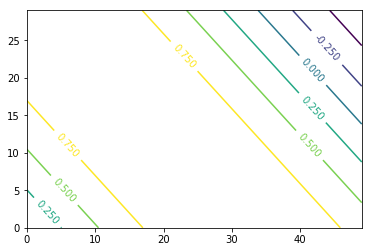

In [28]:
matsize=(30,50)

concentrations=numpy.full(matsize,1.)*numpy.array(range(matsize[1]))+(numpy.full(matsize[::-1],1.)*numpy.array(range(matsize[0]))).T
concentrations = numpy.sin((concentrations)/20)

CS = plt.contour(concentrations)
plt.clabel(CS, inline=2, fontsize=10)
plt.show()

In [29]:
for i in range(2000):
    diffuse_multi_d(concentrations,0.1,1)

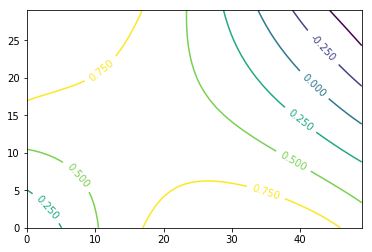

In [30]:
CS = plt.contour(concentrations)
plt.clabel(CS, inline=2, fontsize=10)
plt.show()